### Import necesary libraries

In [2]:
import pandas as pd
import os

### Binding data

In [3]:
path = "/Users/myatpaing/Desktop/SalesAnalysis_Python"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()
for file in files:
    df_monthly = pd.read_csv(path + "/" +file)
    all_months_data = pd.concat([all_months_data, df_monthly])

all_months_data.to_csv ("df.csv", index = False)

### Read dataframe

In [4]:
df = pd.read_csv("df.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleaning data

In [5]:
nan_df = df[df.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2 = df.dropna (how = 'all')
df2.isna().any(axis = 1)

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

### Create "month" column from "Order Date" column

In [7]:
df2['Month'] = df2['Order Date'].str[0:2]
df2.tail()

<ipython-input-7-131a234d36cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",06


In [8]:
df2['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: object

In [9]:
df2 = df2[df2['Order Date'].str[0:2]!='Or']

In [10]:
df2['Month'] = df2['Month'].astype('int32')

### Checking data types for consistency

In [11]:
df2['Quantity Ordered'].head()
df2['Price Each'].head()

0      1700
1     600.0
2     11.95
3    149.99
4     11.95
Name: Price Each, dtype: object

In [12]:
df2['Quantity Ordered'] = pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each'] = pd.to_numeric(df2['Price Each'])

In [13]:
df2['Quantity Ordered'].head()

0    1
1    1
2    1
3    1
4    1
Name: Quantity Ordered, dtype: int64

### Add "Sales" column

In [14]:
df2['Sales'] = df2['Quantity Ordered'] * df2['Price Each']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [15]:
df2['Sales'].head()

0    1700.00
1     600.00
2      11.95
3     149.99
4      11.95
Name: Sales, dtype: float64

In [16]:
df2['Sales'] = pd.to_numeric(df2['Sales'])

In [17]:
df2['Sales'].head()

0    1700.00
1     600.00
2      11.95
3     149.99
4      11.95
Name: Sales, dtype: float64

## What is the best month for sales? How much?

In [18]:
total_by_month = df2.groupby('Month').sum()

### Visualization

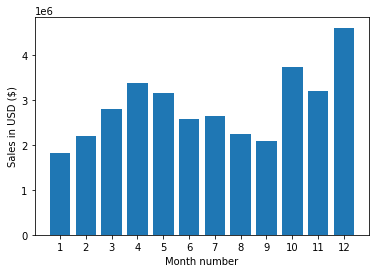

In [19]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, total_by_month ['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### December is the best month for sales with sales revenue of over $400,000.

## Which city has the highest number of sales?

### Creating "City" column

In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df2['City'] = df2['Purchase Address'].apply(lambda x: f"{get_state(x)} - {get_city(x)}")
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY - New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY - New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY - New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA - San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA - Atlanta


In [21]:
total_by_city = df2.groupby(['City']).sum()

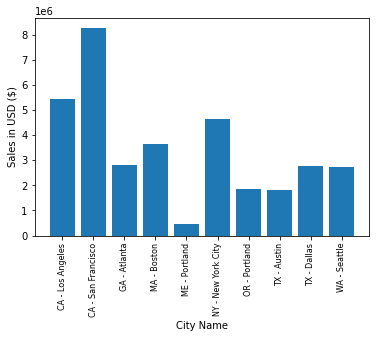

In [22]:
grouped_city =  df2.groupby(['City'])
keys = [city for city, df in grouped_city]

plt.bar(keys,total_by_city['Sales'])
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### CA- San Francisco has the highest sales revenues.

## What time should ads be displayed?

#### Create "hour" column

In [23]:
df2['Hour'] = pd.to_datetime(df2['Order Date']).dt.hour
df2['Minute'] = pd.to_datetime(df2['Order Date']).dt.minute
df2['Count'] = 1
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY - New York City,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY - New York City,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY - New York City,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA - San Francisco,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA - Atlanta,12,38,1


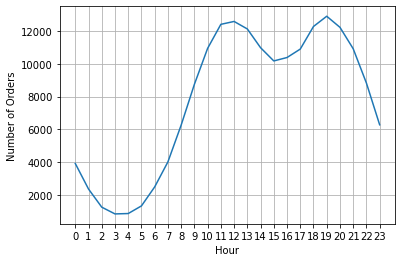

In [24]:
grouped_hour = df2.groupby(['Hour'])
keys = [time for time, df in grouped_hour]

count_by_city = df2.groupby(['Hour']).count()
plt.plot(keys, count_by_city['Count'])
plt.xticks(keys)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

#### My recommendation is between 11am to 12pm or 7pm.

### What products are most often sold together?

In [25]:
OrderID = df2[df2['Order ID'].duplicated(keep=False)]
OrderID.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,MA - Boston,12,37,1
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,MA - Boston,12,37,1
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,MA - Boston,12,37,1
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,MA - Boston,12,37,1
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,NY - New York City,14,32,1


In [39]:
OrderID['Grouped'] = OrderID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-39-2bcb200b5172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OrderID['Grouped'] = OrderID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [34]:
OrderID2 = OrderID[['Order ID', 'Grouped']].drop_duplicates()

In [40]:
OrderID2.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in OrderID2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

print(count)

Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62, ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47, ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33, ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27, ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24, ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16, ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4, ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4-pack)'): 3, ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3, ('iPhone', 'Lightning Charging Cable', 'Lightning Charging

In [36]:
for key,sales_volume in count.most_common(10):
    print(key, sales_volume)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What product sold the most? Why do you think it sold the most?

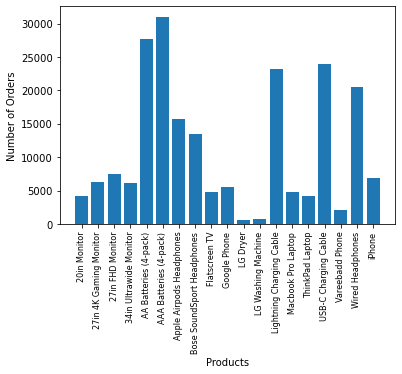

In [28]:
quantity_ordered = df2.groupby('Product').sum()['Quantity Ordered']
keys = [pair for pair, df in df2.groupby('Product')]
plt.bar(keys, quantity_ordered)
plt.ylabel('Number of Orders')
plt.xlabel('Products')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [29]:
prices = df2.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


In [31]:
pip install pyqt5

Note: you may need to restart the kernel to use updated packages.


<ipython-input-42-5be80f7b33d1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-42-5be80f7b33d1>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


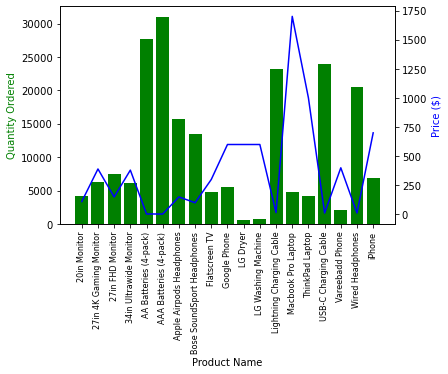

In [42]:
prices = df2.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()